For a square plate of edge length “l=1m”, simulate the continuous evolution of the temperature map (with a time step of 0.01s, for a total of 2s) with the following conditions:
- Temperature at all four edges is 0 degree Celsius
- There is a point source (occasionally sink, you’ll realise soon why!) at the center, with a time varying temperature given as 10sin(pi*t) (Assume that steady state is achieved instantaneously with each time step, so you need not worry about the transient period. That is to say, that at each iteration, the heat map plotted represents the steady state) 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

%matplotlib inline

Initialize the important variables:

In [2]:
# Set Dimension and delta
lenX = lenY = 101 
delta = 1

# Boundary conditions
Ttop = 0
Tbottom = 0
Tleft = 0
Tright = 0

# Initial guess of interior grid
Tguess = 0

# Time and duration of update
Totaltime = 2
Pausetime = 0.01

*Set the "plot window" and meshgrid.* <br>
[np.meshgrid()](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) creates the mesh grid (we'll use this to plot the solution), the first parameter is for the x-dimension, and the second parameter is for the y-dimension.  <br>
We use `np.arange(..., ...)` to arrange a 1-D array with element value that starts from some value to some value, in our case, it's from $0$ to $lenX$ and from $0$ to $lenY$. (Recall how we used this method for solving 1D Heat Equation as well!) <br>
The color-interpolation attribute specifies the color space for gradient interpolations. You can find various colormaps in matplotlib [here](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).

In [3]:
# Set colour interpolation and colour map
colorinterpolation = 100
colourMap = plt.cm.jet #you can try: colourMap = plt.cm.coolwarm
# Set meshgrid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))

*Apply the boundary conditions.* <br>
Now we'll set the region: we define 2-D array, define the size and fill the array with guess value. Then we set the boundary conditions.

In [4]:
# Set array size and set the interior value with Tguess
T = np.empty((lenX, lenY))
T.fill(Tguess)

# Set Boundary condition
T[(lenY-1):, :] = Ttop
T[:1, :] = Tbottom
T[:, (lenX-1):] = Tright
T[:, :1] = Tleft

# t stores all Temperature values at center
t = np.arange(0,Totaltime,Pausetime)
t = np.append(t,Totaltime)

t = 10 * np.sin (np.pi * t)


*Iterate using the discretized Laplace equation in 2-D* <br>
Now we are ready to apply our final equation. We iterate the equation using `for` loop.

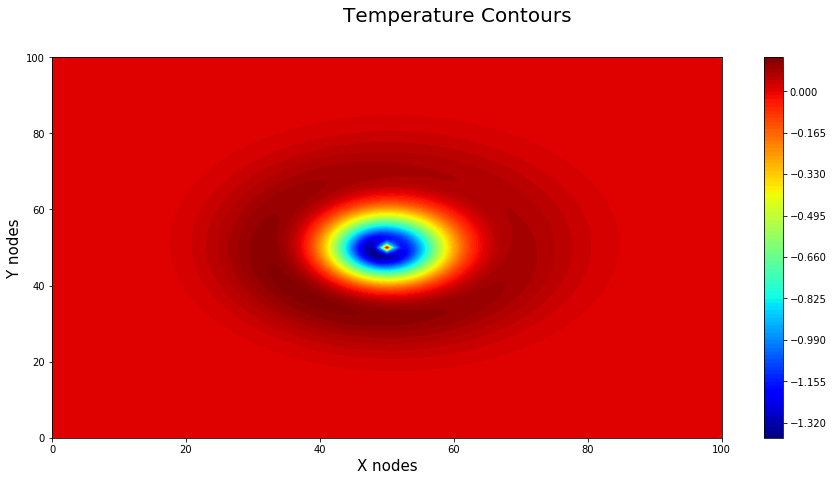

In [5]:
# Iterating first 2 seconds
for idx, value in enumerate(t):
    for i in range(1, lenX-1, delta):
        for j in range(1, lenY-1, delta):
            T[lenX // 2,lenY // 2] = value
            T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])

    plt.figure(figsize=[15, 7])
    plt.suptitle("Temperature Contours", fontsize=20)
    plt.contourf(X, Y, T, levels=colorinterpolation, cmap=colourMap)
    plt.xlabel("X nodes", fontsize=15)
    plt.ylabel("Y nodes", fontsize=15)
    plt.colorbar()
    plt.pause(Pausetime/1000)
    if(idx != Totaltime):
        clear_output(wait=True)
